<a href="https://colab.research.google.com/github/joseortegalabra/MLBI/blob/master/Tarea1_MLBI_Jos%C3%A9_Ignacio_Ortega_Labra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip list
#!pip freeze
#!pip show pandas numpy tensorflow matplotlib sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as kr
from sklearn.model_selection import train_test_split
from platform import python_version
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from matplotlib import animation
from IPython.core.display import display, HTML

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print('Version de python: ',python_version())
print('Version numpy:', np.__version__)
print('Version pandas:', pd.__version__)
print('Version tensorflow:', tf.__version__)
#print('Version sklearn:', sklearn.__version__)

Version de python:  3.6.9
Version numpy: 1.18.3
Version pandas: 1.0.3
Version tensorflow: 2.2.0-rc3


In [0]:
#!git clone https://github.com/joseortegalabra/MLBI.git

In [0]:
def createDummies(df, var, prefijo):
  '''
  input dataframe y un string con EL nombre de la variable a eliminar y nombre del prefijo que quiero que aparesca
  en formato string
  '''
  dummy = pd.get_dummies(df[var], prefix = prefijo)
  df = df.drop(var, axis = 1)
  df = pd.concat([df, dummy], axis = 1)
  return df

#cluster en forma numérica
def n_cluster(row):
  if row == 'C1':
    return 1
  elif row == 'C2':
    return 2
  elif row == 'C3':
    return 3
  else:
    return 4

def visualize_original_data2d(data, label, hight, widht):
  #obs: this funcion read data type only numpy type
  fig = plt.figure(figsize = ((hight, widht)))
  plt.title('Original Data 2D', fontsize = 25)
  plt.scatter(data[:,0], data[:, 1], c = label)

def visualize_data2d_train_test(X_2d_train, y_2d_train, X_2d_test, y_2d_test, prediction = False):
  fig, axs = plt.subplots(1, 2, figsize = ((20,10)))
  ax = axs[0]
  #train
  ax.scatter(X_2d_train[:,0], X_2d_train[:,1], c = y_2d_train)
  if(prediction == False):
    ax.set_title('Real Data Train', fontsize = 25)
  if(prediction == True):
    ax.set_title('Prediction Train', fontsize = 25)

  #test
  ax = axs[1]
  ax.scatter(X_2d_test[:,0], X_2d_test[:,1], c = y_2d_test)
  if(prediction == False):
    ax.set_title('Real Data Test', fontsize = 25)
  if(prediction == True):
    ax.set_title('Prediction Test', fontsize = 25)

def train_results(train_loss, test_loss, train_acc, test_acc):
  fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = ((14, 7)))
  ax = axs[0]
  ax.set_title('Loss', fontsize = 25)
  ax.grid(color = 'black', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
  ax.plot(train_loss, label = 'loss_train', color = 'black', linestyle = '-')
  ax.plot(test_loss, label = 'loss_test', color = 'orange')
  ax.set_xlabel('Epochs', fontsize = 13)
  ax.legend()

  ax = axs[1]
  ax.set_title('Accuracy', fontsize = 25)
  ax.grid(color = 'black', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
  ax.plot(train_acc, label = 'acc_train', color = 'black', linestyle = '-')
  ax.plot(test_acc, label = 'acc_test', color = 'orange')
  ax.set_xlabel('Epochs', fontsize = 13)
  plt.legend()

def f1_score_train_test(y_train, y_train_predict, y_test, y_test_predict):
  print('F1 score conjunto de entrenamiento')
  print('Macro:', f1_score(y_train, y_train_predict, average='macro'))
  print('Micro:', f1_score(y_train, y_train_predict, average='micro'))
  print('Weighted:', f1_score(y_train, y_train_predict, average='weighted'))
  print('De cada clase:', f1_score(y_train, y_train_predict, average=None))

  print('\n\nF1 score conjunto de entrenamiento')
  print('Macro:', f1_score(y_test, y_test_predict, average='macro'))
  print('Micro:', f1_score(y_test, y_test_predict, average='micro'))
  print('Weighted:', f1_score(y_test, y_test_predict, average='weighted'))
  print('De cada clase:', f1_score(y_test, y_test_predict, average=None))


def confussion_matrix_train_test(y_train, y_train_predict, y_test, y_test_predict, normalize = True):
  confusion_matrix_train = confusion_matrix(y_train, y_train_predict)
  confusion_matrix_test = confusion_matrix(y_test, y_test_predict)
  fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = ((10, 5)))
  plt.subplots_adjust(hspace = 1)
  #train
  axs[0].set_xlabel('Prediction')
  axs[0].set_ylabel('True')
  if(normalize == False):
    sns.heatmap(pd.DataFrame(confusion_matrix_train), ax = axs[0] ,annot = True, fmt = 'd', linewidths=.5)
    axs[0].set_title('Confussion Matrix Train', fontsize = 15)
  if(normalize == True):
    sns.heatmap(pd.DataFrame(confusion_matrix_train).div(pd.DataFrame(confusion_matrix_train).sum(axis = 1), axis = 0), ax = axs[0] ,annot = True, fmt = '.3f', linewidths=.5)
    axs[0].set_title('Confussion Matrix Train Normalize', fontsize = 15)

  #test
  axs[1].set_xlabel('Prediction')
  axs[1].set_ylabel('True')
  if(normalize == False):
    sns.heatmap(pd.DataFrame(confusion_matrix_test), ax = axs[1], annot= True, fmt = 'd',  linewidths=.5)
    axs[1].set_title('Confussion Matrix Test', fontsize = 15)
  if(normalize == True):
    sns.heatmap(pd.DataFrame(confusion_matrix_test).div(pd.DataFrame(confusion_matrix_test).sum(axis = 1), axis = 0), ax = axs[1], annot = True, fmt = '.3f', linewidths=.5)
    axs[1].set_title('Confussion Matrix Test Normalize', fontsize = 15)

def visualize_full2d_train_test(X_2d_train, y_2d_train, X_2d_test, y_2d_test, scaler, pca, model):
  fig, axs = plt.subplots(1, 2, figsize = ((18,8)))
  #train con los datos 2d
  ax =axs[0]
  x_min, x_max = X_2d_train[:, 0].min() - 2., X_2d_train[:, 0].max() + 2.
  y_min, y_max = X_2d_train[:, 1].min() - 2., X_2d_train[:, 1].max() + 2.
  h = 2.  # step size in the mesh 0.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  data_fict_2d = np.c_[xx.ravel(), yy.ravel()]#tengo todos los puntos de mapa 2d (x1, y1), (x1,y2)
  data_fict = scaler.transform(pca.inverse_transform(data_fict_2d))
  Z = model.predict_classes(data_fict)
  Z = Z.reshape(xx.shape)
  ax.pcolormesh(xx, yy, Z) #, cmap=plt.cm.Paired

  ax.scatter(X_2d_train[:, 0], X_2d_train[:, 1], c=y_2d_train, edgecolors='k') #, cmap=plt.cm.Paired
  ax.set_title('Train', fontsize = 25)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())

  #test
  ax = axs[1]
  x_min, x_max = X_2d_test[:, 0].min() - 2., X_2d_test[:, 0].max() + 2.
  y_min, y_max = X_2d_test[:, 1].min() - 2., X_2d_test[:, 1].max() + 2.
  h = 3.  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  data_fict_2d = np.c_[xx.ravel(), yy.ravel()]
  data_fict = scaler.transform(pca.inverse_transform(data_fict_2d))

  Z = model_lr.predict_classes(data_fict)
  Z = Z.reshape(xx.shape)
  ax.pcolormesh(xx, yy, Z) #, cmap=plt.cm.Paired
  ax.scatter(X_2d_test[:, 0], X_2d_test[:, 1], c=y_2d_test, edgecolors='k') #, cmap=plt.cm.Paired
  ax.set_title('Test', fontsize = 25)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())

def create_batch(X, y, batch_size):
  rand_idx = np.random.choice(len(X), size = batch_size)
  data_x = X[rand_idx]
  data_y = y[rand_idx]
  return data_x, data_y

def predictions_ex1(X, model):
  return tf.argmax(model(X), axis=1).numpy()  #predicciones en formato entero

In [0]:
#clase pregunta 1
class exercise1_class():
  def __init__(self):
    path = 'https://raw.githubusercontent.com/joseortegalabra/MLBI/master/Tarea1/dataset1.xlsx'
    self.data = pd.read_excel(path)

  def adjust(self):
    self.data = createDummies(self.data, 'crr_Nom', 'crr')
    aux = self.data['cluster'].map(n_cluster)
    self.data['cluster'] = aux

  def train_test(self):
    self.features = list(set(self.data.columns.tolist())-set(['cluster']))
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data[self.features], self.data['cluster'], test_size = 0.2, random_state = 0)
  
  def transform_2d(self):
    self.pca = PCA(2)
    self.X_train_2d = self.pca.fit_transform(self.X_train)
    self.X_test_2d = self.pca.transform(self.X_test)
    
  def transform_scaler(self):
    self.scaler = MinMaxScaler()
    self.X_train_scaled = self.scaler.fit_transform(self.X_train)
    self.X_test_scaled = self.scaler.transform(self.X_test)
    
  def y_one_hot_encoder(self):
    self.y_train_dummy = np.array(pd.get_dummies(self.y_train), dtype = 'float')
    self.y_test_dummy = np.array(pd.get_dummies(self.y_test), dtype = 'float')

In [0]:
class exercise2_class():
  def __init__(self):
    path = 'https://raw.githubusercontent.com/joseortegalabra/MLBI/master/Tarea1/dataset2.csv'
    self.data = pd.read_csv(path)
  def transform(self):
    self.data['condition'] = self.data['condition'].astype(float)
  def test_train(self):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data[['x', 'y']], self.data['condition'], test_size = 0.2, random_state = 0)
  def transform_scaler(self):
    self.scaler = MinMaxScaler()
    self.X_train_scaled = self.scaler.fit_transform(self.X_train)
    self.X_test_scaled = self.scaler.transform(self.X_test)

# Pregunta 1

# Data Analysis

In [7]:
ex1 = exercise1_class()
ex1.data.head()

,crr_Nom,psu_Nem,psu_Leng,psu_Mate,psu_Cie,psu_Pond,Longitud,Latitud,cred_apr,distancia,F,M,PARTICULAR_SUBVENCIONADO,PARTICULAR_PAGADO,MUNICIPAL,cluster
0,INGENIERIA CIVIL INDUSTRIAL,783,653,685,672,735,-73.16487,-36.978759,38,20.201244,1,0,1,0,0,C2
1,INGENIERIA CIVIL BIOMEDICA,799,705,713,686,756,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C1
2,INGENIERIA CIVIL QUIMICA,688,543,612,534,638,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,C3
3,INGENIERIA CIVIL ELECTRICA,605,598,658,601,633,-73.16487,-36.978759,21,20.201244,0,1,1,0,0,C2
4,INGENIERIA CIVIL INFORMATICA,603,710,668,651,657,-73.16487,-36.978759,19,20.201244,0,1,1,0,0,C2


In [8]:
ex1.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7866 entries, 0 to 7865
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   crr_Nom                   7866 non-null   object 
 1   psu_Nem                   7866 non-null   int64  
 2   psu_Leng                  7866 non-null   int64  
 3   psu_Mate                  7866 non-null   int64  
 4   psu_Cie                   7866 non-null   int64  
 5   psu_Pond                  7866 non-null   int64  
 6   Longitud                  7866 non-null   float64
 7   Latitud                   7866 non-null   float64
 8   cred_apr                  7866 non-null   int64  
 9   distancia                 7866 non-null   float64
 10  F                         7866 non-null   int64  
 11  M                         7866 non-null   int64  
 12  PARTICULAR_SUBVENCIONADO  7866 non-null   int64  
 13  PARTICULAR_PAGADO         7866 non-null   int64  
 14  MUNICIPA

In [0]:
#ex1.data['cluster'].hist()

In [0]:
#ex1.data['crr_Nom'].value_counts()

In [11]:
#Ajustar base de datos a formato numérico
print('Adjust data to numerical values')
ex1.adjust()
ex1.data.head()

Adjust data to numerical values


,psu_Nem,psu_Leng,psu_Mate,psu_Cie,psu_Pond,Longitud,Latitud,cred_apr,distancia,F,M,PARTICULAR_SUBVENCIONADO,PARTICULAR_PAGADO,MUNICIPAL,cluster,crr_INGENIERIA CIVIL,crr_INGENIERIA CIVIL - PLAN COMUN,crr_INGENIERIA CIVIL AEROESPACIAL,crr_INGENIERIA CIVIL BIOMEDICA,crr_INGENIERIA CIVIL DE MATERIALES,crr_INGENIERIA CIVIL ELECTRICA,crr_INGENIERIA CIVIL ELECTRONICA,crr_INGENIERIA CIVIL EN TELECOMUNICACIONES,crr_INGENIERIA CIVIL INDUSTRIAL,crr_INGENIERIA CIVIL INFORMATICA,crr_INGENIERIA CIVIL MECANICA,crr_INGENIERIA CIVIL METALURGICA,crr_INGENIERIA CIVIL QUIMICA,crr_INGENIERÍA CIVIL DE MINAS
0,783,653,685,672,735,-73.16487,-36.978759,38,20.201244,1,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,799,705,713,686,756,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,688,543,612,534,638,-73.16487,-36.978759,36,20.201244,1,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,605,598,658,601,633,-73.16487,-36.978759,21,20.201244,0,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,603,710,668,651,657,-73.16487,-36.978759,19,20.201244,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
ex1.train_test()
print('Tamaño data entrenamiento X:', ex1.X_train.shape)
print('Tamaño data entrenamiento y:', ex1.y_train.shape)
print('Tamaño data test X:', ex1.X_test.shape)
print('Tamaño data test y:', ex1.y_test.shape)

Tamaño data entrenamiento X: (6292, 28)
Tamaño data entrenamiento y: (6292,)
Tamaño data test X: (1574, 28)
Tamaño data test y: (1574,)


Visualization Data in two dimensiones with PCA - reduction dimensionality


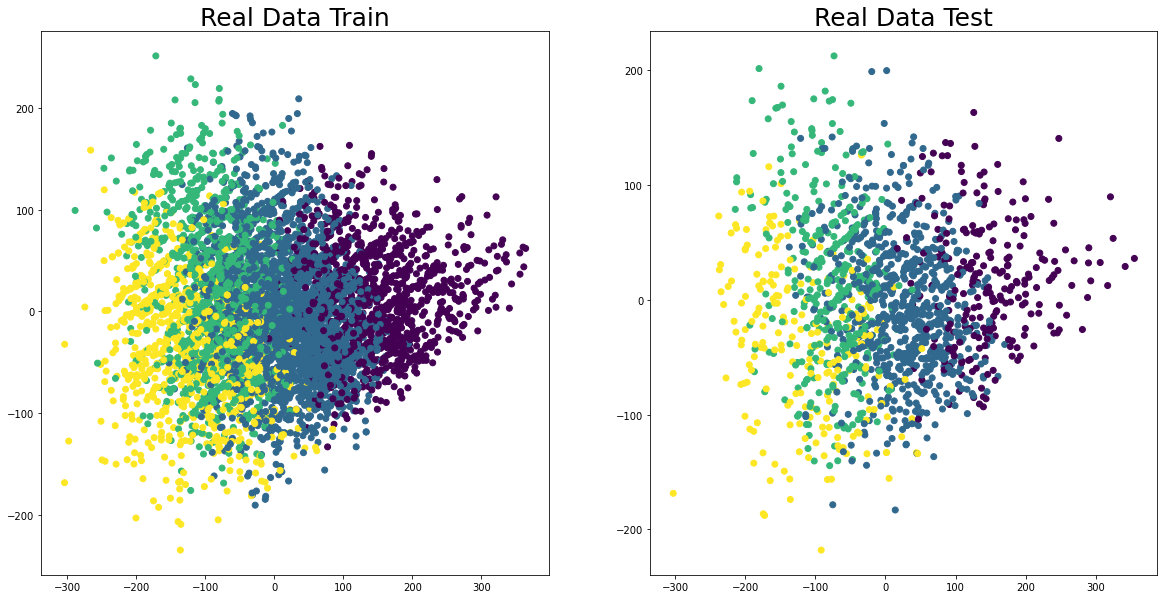

In [13]:
print('Visualization Data in two dimensiones with PCA - reduction dimensionality')
ex1.transform_2d()
visualize_data2d_train_test(ex1.X_train_2d, ex1.y_train, ex1.X_test_2d, ex1.y_test, prediction = False)

In [0]:
ex1.transform_scaler()

# NN WITH KERAS AND TENSORFLOW

In [0]:
lr = 0.01  #learning rate por defecto en adam es 0.001
epochs = 250 #número de iteraciones
batch_size = 500 #por defecto es 32
nn = [ex1.X_train_scaled.shape[1], 16, 4] #número de neuronas por layer

In [16]:
ex1.y_one_hot_encoder()
print('Dimesions Train X:',ex1.X_train_scaled.shape)
print('Dimensions Train y:',ex1.y_train_dummy.shape)
print('Dimensions Test X:',ex1.X_test_scaled.shape)
print('Dimensions Test y:', ex1.y_test_dummy.shape)

Dimesions Train X: (6292, 28)
Dimensions Train y: (6292, 4)
Dimensions Test X: (1574, 28)
Dimensions Test y: (1574, 4)


In [0]:
#MODEL LAYERS WITH KERAS AND THE REST WITH TENSORFLOW
class model_1(kr.Model):
  def __init__(self, nn, batch_size):
    super(model_1, self).__init__()
    self.l1 = kr.layers.Dense(nn[1] , activation = 'relu')
    self.l2 = kr.layers.Dense(units = nn[2], activation = 'softmax')
  
  def call(self, x):
    x = self.l1(x)
    return self.l2(x)

model_ex1 = model_1(nn, batch_size)

#training loss and optimizer
loss_object = kr.losses.CategoricalCrossentropy()   
optimizer = kr.optimizers.Adam(learning_rate = lr)

#metrics for training, loss and accuracy
train_loss = kr.metrics.Mean(name = 'train_loss')
train_accuracy = kr.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')  

test_loss = kr.metrics.Mean(name = 'test_loss')
test_accuracy =  kr.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

#function for tranining
def train_step(data, labels):
  with tf.GradientTape() as tape:
    predictions = model_ex1(data)  
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model_ex1.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model_ex1.trainable_variables))

  train_loss(loss)
  train_accuracy(  tf.argmax(labels, axis=1).numpy() , predictions)

#function to test
def test_step(data, labels):
  predictions = model_ex1(data) 
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy( tf.argmax(labels, axis=1).numpy(), predictions)


#Data form meshgrid traning 2d visualization with pca
x_min, x_max = ex1.X_train_2d[:, 0].min() - 2., ex1.X_train_2d[:, 0].max() + 2.
y_min, y_max = ex1.X_train_2d[:, 1].min() - 2., ex1.X_train_2d[:, 1].max() + 2.
h = 2.  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
data_fict_2d = np.c_[xx.ravel(), yy.ravel()]
data_fict = ex1.scaler.transform(ex1.pca.inverse_transform(data_fict_2d))

ims = []

In [18]:
#training
loss_vector_train = []
loss_vector_test = []
acc_vector_train = []
acc_vector_test = []
iPY = []  #save animation results


for epoch in range(epochs):
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  #traning with batches
  data_train, labels_train = create_batch(ex1.X_train_scaled, ex1.y_train_dummy, batch_size)
  train_step(data_train, labels_train)
  loss_vector_train.append(train_loss.result().numpy())
  acc_vector_train.append(train_accuracy.result().numpy())

  #test with all data
  test_step(ex1.X_test_scaled, ex1.y_test_dummy)
  loss_vector_test.append(test_loss.result().numpy()) 
  acc_vector_test.append(test_accuracy.result().numpy()) 

  #print results
  if(epoch % 10 ==0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_accuracy.result(), test_loss.result(), test_accuracy.result()))
  
  #meshgrid results
  Z = predictions_ex1(data_fict, model_ex1)
  Z = Z.reshape(xx.shape)
  iPY.append(Z)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 1.3905293941497803, Accuracy: 0.32199999690055847, Test Loss: 1.3315315246582031, Test Accuracy: 0.44980940222740173
Epoch 6, Loss: 1.225913166999817, Accuracy: 0.46000000834465027, Test Loss: 1.1999058723449707, Test Accuracy: 0.47966963052749634
Epoch 11, Loss: 1.1750612258911133, Accuracy: 0.46399998664855957, Test Loss: 1.1394325494766235, Test Accuracy: 0.4822109341621399
Epoch 16, Loss: 1.1002755165100098, Accuracy: 0.5299999713897705, Test Loss: 1.0637896060943604, Test Accuracy: 0

--- Imagen Final del Training Set en 2D usando reducción de dimensionalidad PCA---


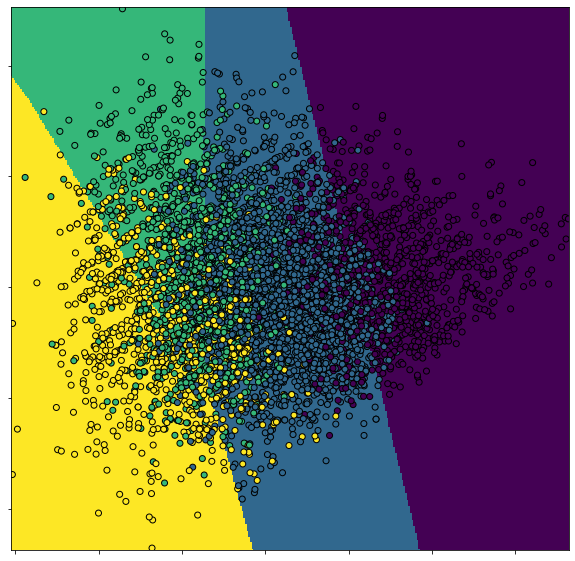

In [19]:
#Animation TRAIN SET
ims = []
fig = plt.figure(figsize=(10, 10))
print("--- Imagen Final del Training Set en 2D usando reducción de dimensionalidad PCA---")

for fr in range(len(iPY)):
  im = plt.pcolormesh(xx, yy, iPY[fr], animated=True)
  plt.scatter(ex1.X_train_2d[:, 0], ex1.X_train_2d[:, 1], c=ex1.y_train, edgecolors='k')
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])

In [56]:
ani = animation.ArtistAnimation(fig, ims, interval=250, blit=True, repeat_delay=100)
HTML(ani.to_html5_video())

Metrics


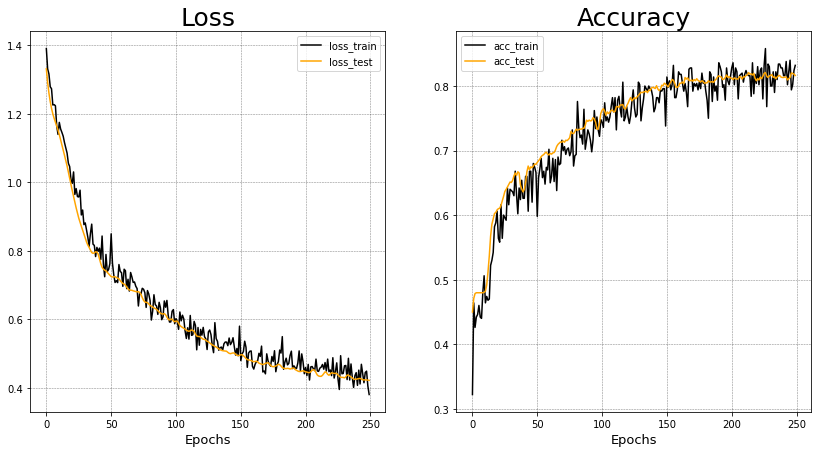

In [20]:
#graficar loss y acc
print('Metrics')
train_results(loss_vector_train, loss_vector_test, acc_vector_train, acc_vector_test)

In [21]:
print('Make Predicctions')
y_train_predict =  predictions_ex1(ex1.X_train_scaled,model_ex1)
y_test_predict = predictions_ex1(ex1.X_test_scaled,model_ex1)

Make Predicctions


Results NN Clasification using pca reduced two dimensions


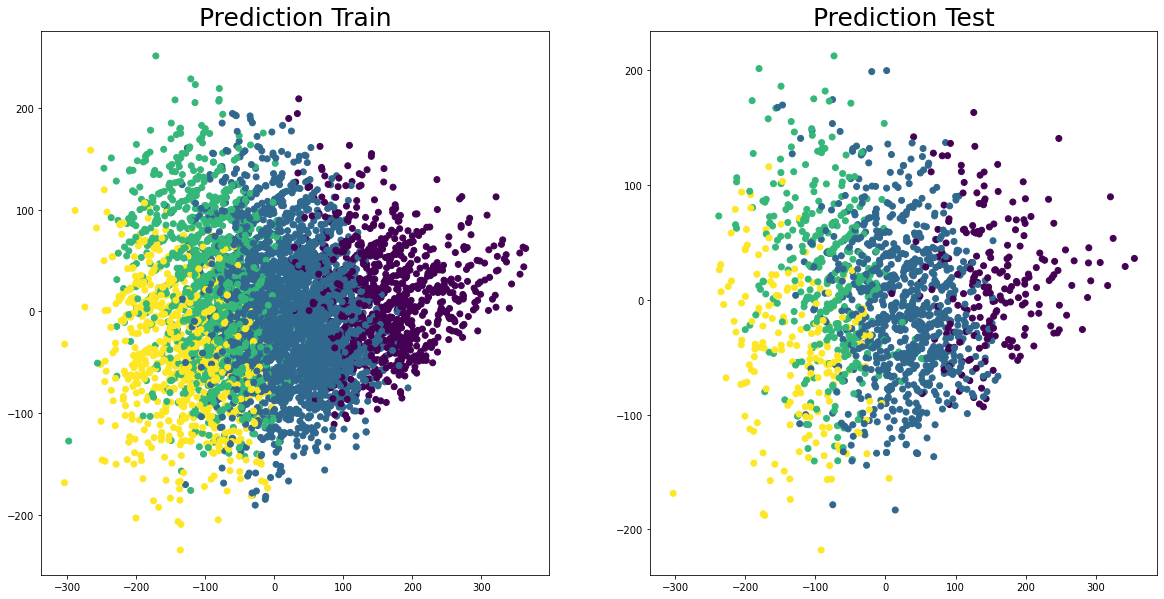

In [27]:
print('Results NN Clasification using pca reduced two dimensions')
visualize_data2d_train_test(ex1.X_train_2d, y_train_predict, ex1.X_test_2d, y_test_predict, prediction = True)

In [28]:
print('F1-score')
f1_score_train_test(ex1.y_train, y_train_predict, ex1.y_test, y_test_predict)

F1-score
F1 score conjunto de entrenamiento
Macro: 0.06181063157591331
Micro: 0.08852511125238399
Weighted: 0.08216882322337131
De cada clase: [0.         0.12692399 0.08285119 0.09927798 0.        ]


F1 score conjunto de entrenamiento
Macro: 0.05634544489220752
Micro: 0.0781448538754765
Weighted: 0.07684254372262542
De cada clase: [0.         0.09433962 0.07789855 0.10948905 0.        ]


Confusion Matrix


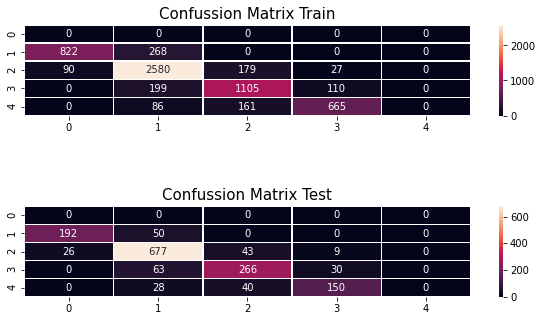

In [29]:
print('Confusion Matrix')
confussion_matrix_train_test(ex1.y_train, y_train_predict, ex1.y_test, y_test_predict, normalize = False)

In [30]:
print('Summary Metrics')
etiqueta_cluster = ['C1', 'C2', 'C3', 'C4']
print('--------CLASSIFICATION REPORT TRAIN--------')
print(classification_report(ex1.y_train, y_train_predict, target_names = etiqueta_cluster, digits = 4))
print('\n--------CLASSIFICATION REPORT TEST--------')
print(classification_report(ex1.y_test, y_test_predict, target_names = etiqueta_cluster, digits = 4))

Summary Metrics
--------CLASSIFICATION REPORT TRAIN--------


ValueError: ignored

## Using Keras(only keras)

In [0]:
#a la variable y restarle 1 para dejarlo en los rangos 0 a 3 que admite keras
ex1.y_train = ex1.y_train - 1.0
ex1.y_test = ex1.y_test - 1.0

In [0]:
#parametros de NN
lr = 0.001  #learning rate por defecto en adam es 0.001
epochs = 50 #número de iteraciones
batch_size = 50 #por defecto es 32
nn = [ex1.X_train_scaled.shape[1], 16, 4] #número de neuronas por layer

In [0]:
model_lr = kr.Sequential()
#capa 1
l1 = model_lr.add(kr.layers.Dense(nn[1], activation = 'relu'))
#capa 2
l2 = model_lr.add(kr.layers.Dense(nn[2], activation = 'softmax'))

#compilar el modelo
adam_optimizer = kr.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_lr.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = adam_optimizer,
                 metrics = ['accuracy'])
#kr.losses.sparse_categorical_crossentropy    #otra funcion de perdida posible
#'categorical_crossentropy'

history = model_lr.fit(
    ex1.X_train_scaled,   #X entrenamiento
    ex1.y_train,  # y entrenamiento
    batch_size = batch_size,
    verbose = 0,       # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
    epochs = epochs, #iteraciones
    validation_data =  (ex1.X_test_scaled, ex1.y_test)#tiene que ser una tupla X_test, y_test
    )

In [36]:
model_lr.summary() #ver la cantidad de variables del modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  464       
_________________________________________________________________
dense_3 (Dense)              multiple                  68        
Total params: 532
Trainable params: 532
Non-trainable params: 0
_________________________________________________________________


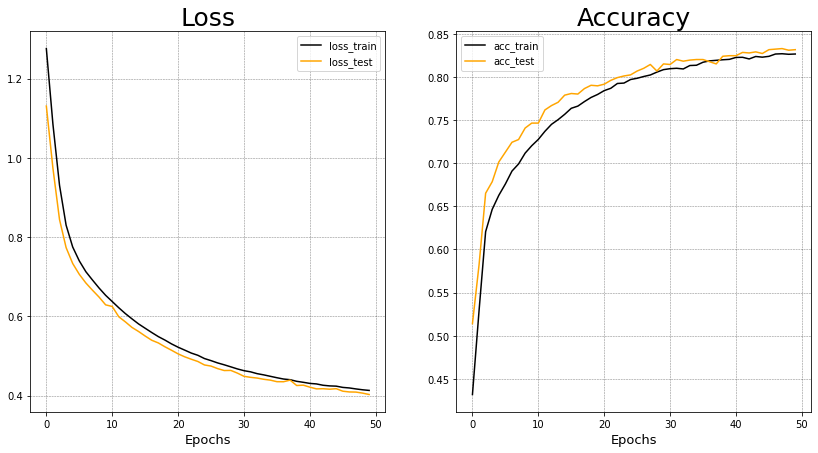

In [37]:
train_results(history.history['loss'], history.history['val_loss'], history.history['accuracy'], history.history['val_accuracy'])

In [38]:
y_train_predict = model_lr.predict_classes(ex1.X_train_scaled)
y_test_predict = model_lr.predict_classes(ex1.X_test_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Results Train and Test using PCA


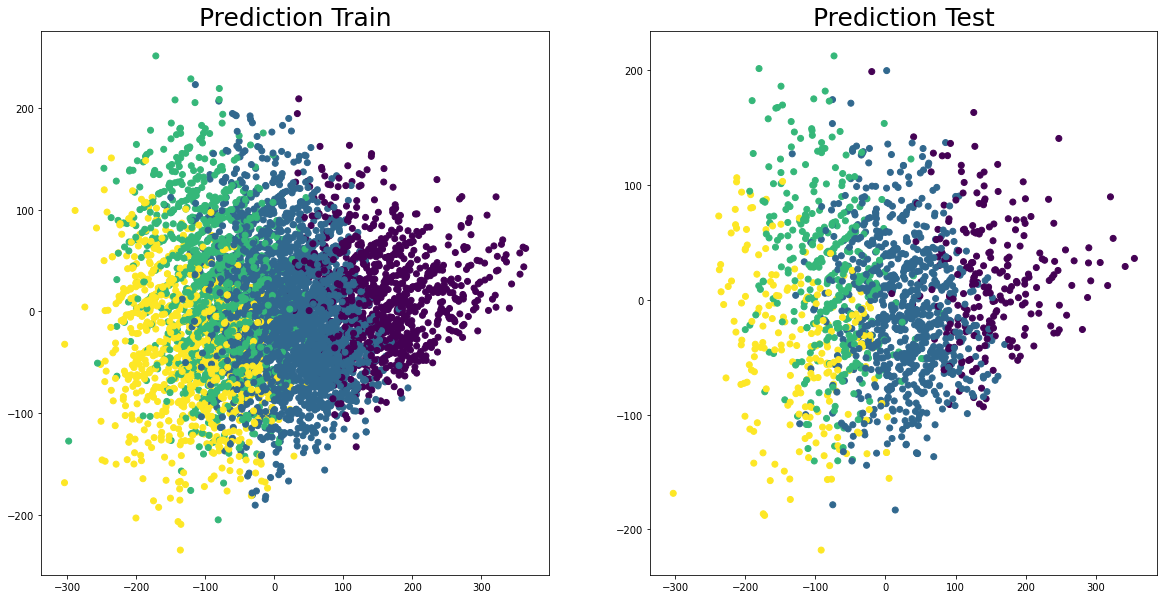

In [39]:
print('Results Train and Test using PCA')
visualize_data2d_train_test(ex1.X_train_2d, y_train_predict, ex1.X_test_2d, y_test_predict, prediction = True)

Map with limits of cluster in 2d


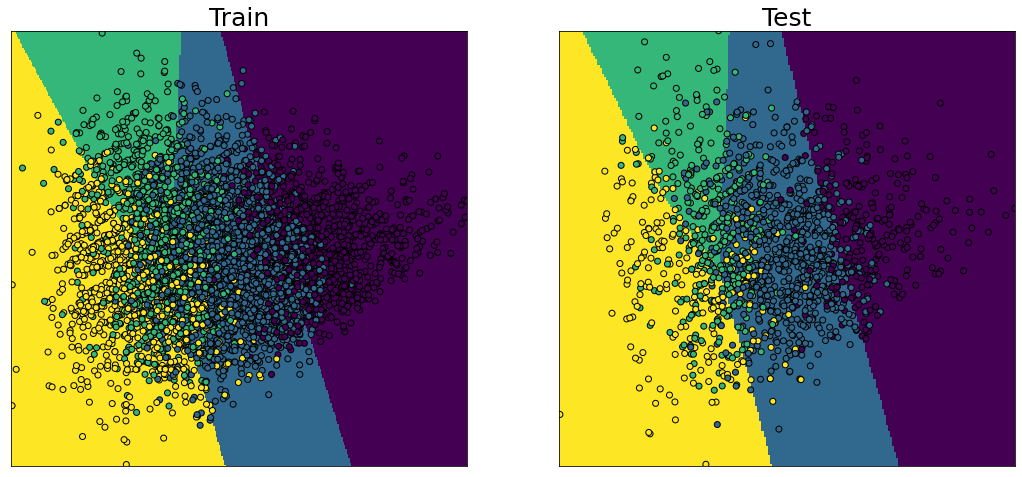

In [40]:
print('Map with limits of cluster in 2d')
visualize_full2d_train_test(ex1.X_train_2d, ex1.y_train, ex1.X_test_2d, ex1.y_test, ex1.scaler, ex1.pca, model_lr )

## Using logistic-Regresion sklearn

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




Accurancy set entrenamiento: 0.79704
Accurancy set testeo: 0.79543


--------CLASSIFICATION REPORT TRAIN--------
              precision    recall  f1-score   support

          C1     0.8605    0.7468    0.7996      1090
          C2     0.8102    0.8759    0.8418      2876
          C3     0.7395    0.7129    0.7260      1414
          C4     0.7712    0.7390    0.7548       912

    accuracy                         0.7970      6292
   macro avg     0.7954    0.7686    0.7805      6292
weighted avg     0.7974    0.7970    0.7958      6292


--------CLASSIFICATION REPORT TEST--------
              precision    recall  f1-score   support

          C1     0.8297    0.7851    0.8068       242
          C2     0.8146    0.8728    0.8427       755
          C3     0.7656    0.6825    0.7216       359
          C4     0.7315    0.7248    0.7281       218

    accuracy                         0.7954      1574
   macro avg     0.7853    0.7663    0.7748      1574
weighted avg     0.7942   

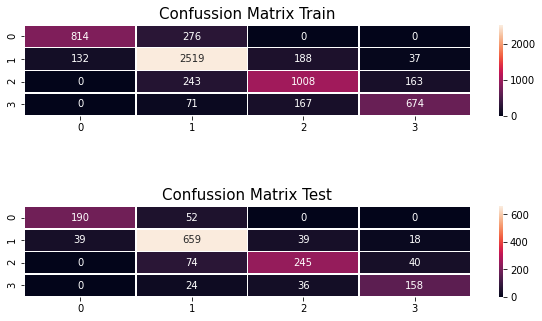

In [41]:
lr = LogisticRegression(random_state = None)
lr.fit(ex1.X_train_scaled, ex1.y_train)
y_train_predict = lr.predict(ex1.X_train_scaled)
y_test_predict = lr.predict(ex1.X_test_scaled)

print ('\n\nAccurancy set entrenamiento: {:.5f}'.format(lr.score(ex1.X_train_scaled, ex1.y_train)))
print ('Accurancy set testeo: {:.5f}'.format(lr.score(ex1.X_test_scaled, ex1.y_test)))

# Reporte resumen
etiqueta_cluster = ['C1', 'C2', 'C3', 'C4']
print('\n\n--------CLASSIFICATION REPORT TRAIN--------')
print(classification_report(ex1.y_train, y_train_predict, target_names = etiqueta_cluster, digits = 4))
print('\n--------CLASSIFICATION REPORT TEST--------')
print(classification_report(ex1.y_test, y_test_predict, target_names = etiqueta_cluster, digits = 4))

confussion_matrix_train_test(ex1.y_train, y_train_predict, ex1.y_test, y_test_predict, normalize = False)



# Pregunta 2

## Data Anylisis

In [42]:
ex2 = exercise2_class()
ex2.data.head(3)

,x,y,condition
0,7391.708670,5.898348e+06,1
1,48438.984252,5.946210e+06,1
2,-2768.592216,5.946243e+06,1


In [43]:
ex2.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81647 entries, 0 to 81646
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x          81647 non-null  float64
 1   y          81647 non-null  float64
 2   condition  81647 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.9 MB


In [44]:
ex2.transform()
print('Data transform to float')
ex2.data.head(3)

Data transform to float


,x,y,condition
0,7391.708670,5.898348e+06,1.0
1,48438.984252,5.946210e+06,1.0
2,-2768.592216,5.946243e+06,1.0


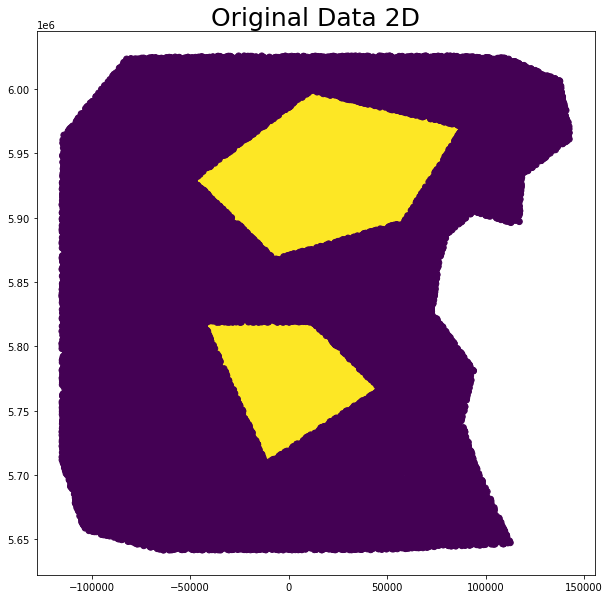

In [45]:
visualize_original_data2d(np.array(ex2.data[['x', 'y']]), np.array(ex2.data['condition']), hight = 10, widht=10)

Visualization Data  Train y Test


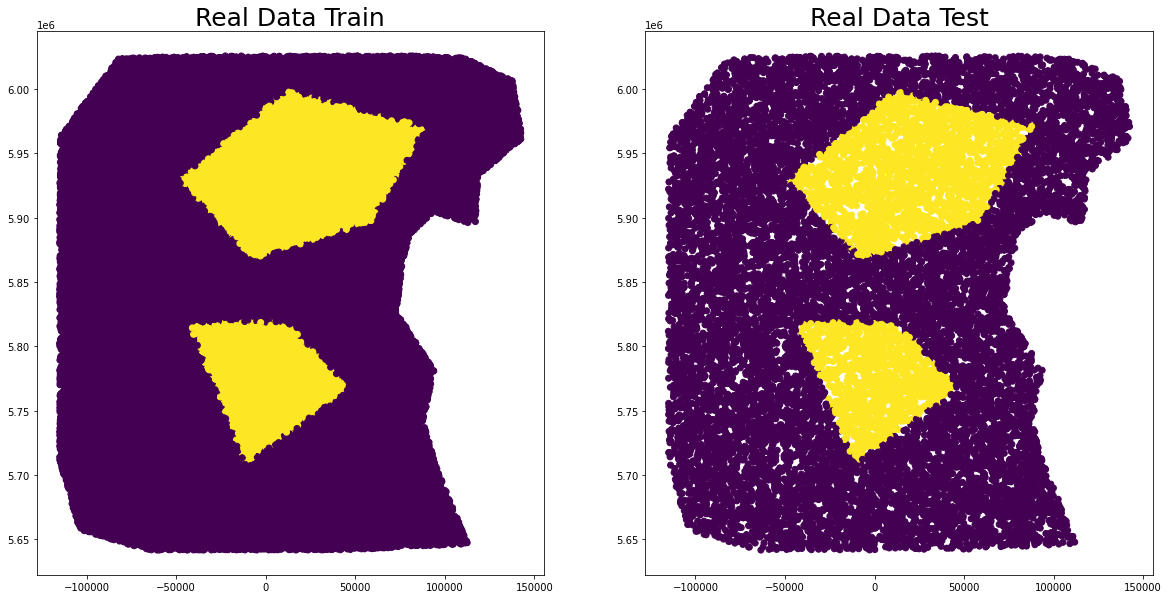

In [46]:
ex2.test_train()
print('Visualization Data  Train y Test')
visualize_data2d_train_test(np.array(ex2.X_train), np.array(ex2.y_train), np.array(ex2.X_test), np.array(ex2.y_test), False)

In [0]:
ex2.transform_scaler()

# Keras (only Keras)

In [0]:
lr = 0.01
epochs = 500
batch_size = 10000
nn = [ex2.X_train.shape[1], 16, 16, 1]

In [0]:
#model
model_lr2 = kr.Sequential()
m1 = model_lr2.add(kr.layers.Dense(nn[1], activation = 'relu'))
m2 = model_lr2.add(kr.layers.Dense(nn[2], activation = 'relu'))
m3 = model_lr2.add(kr.layers.Dense(nn[3], activation = 'sigmoid'))
#compilar
adam_optimizer = kr.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999,amsgrad=False)
model_lr2.compile(loss = 'binary_crossentropy',
            optimizer = adam_optimizer,
            metrics = ['accuracy']
            ) #funciones perdida binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy
#ajustar
history2 = model_lr2.fit(
    ex2.X_train_scaled,
    ex2.y_train,
    batch_size = batch_size,
    verbose = 0,
    epochs = epochs,
    validation_data = (ex2.X_test_scaled, ex2.y_test)
)

In [0]:
y_train_2_predict = model_lr2.predict_classes(ex2.X_train_scaled)
y_test_2_predict = model_lr2.predict_classes(ex2.X_test_scaled)

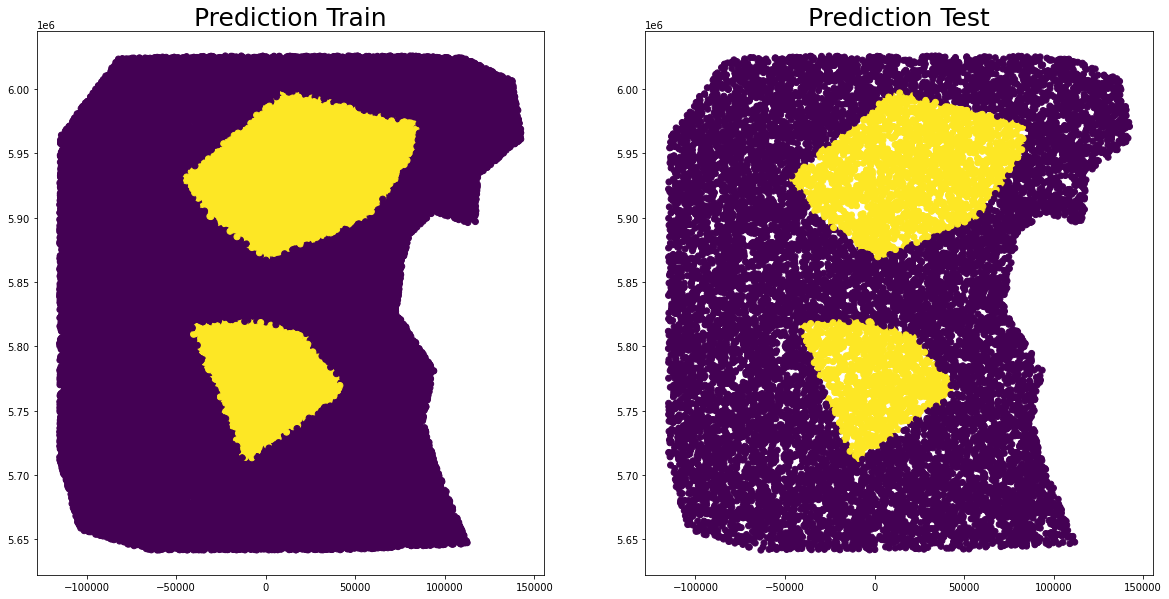

In [51]:
visualize_data2d_train_test(np.array(ex2.X_train),y_train_2_predict, np.array(ex2.X_test), 
                             y_test_2_predict, prediction = True)

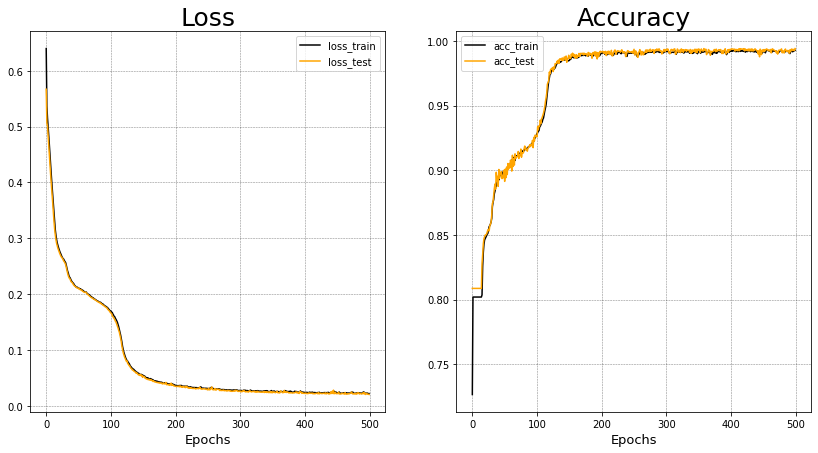

In [52]:
train_results(history2.history['loss'], history2.history['val_loss'], history2.history['accuracy'], history2.history['val_accuracy'] )

In [53]:
print('Summary Metrics')
print('------CLASSIFICATION REPORT TRAIN------')
print(classification_report(ex2.y_train, y_train_2_predict, digits= 4))

print('\n\n------CLASSIFICATION REPORT TEST------')
print(classification_report(ex2.y_test, y_test_2_predict, digits = 4))

Summary Metrics
------CLASSIFICATION REPORT TRAIN------
              precision    recall  f1-score   support

         0.0     0.9946    0.9969    0.9957     52381
         1.0     0.9872    0.9780    0.9826     12936

    accuracy                         0.9931     65317
   macro avg     0.9909    0.9874    0.9891     65317
weighted avg     0.9931    0.9931    0.9931     65317



------CLASSIFICATION REPORT TEST------
              precision    recall  f1-score   support

         0.0     0.9953    0.9973    0.9963     13205
         1.0     0.9887    0.9802    0.9844      3125

    accuracy                         0.9941     16330
   macro avg     0.9920    0.9888    0.9904     16330
weighted avg     0.9940    0.9941    0.9941     16330



In [54]:
print('F1-score')
f1_score_train_test(ex2.y_train, y_train_2_predict, ex2.y_test, y_test_2_predict)

F1-score
F1 score conjunto de entrenamiento
Macro: 0.9891414116205954
Micro: 0.9931258324785278
Weighted: 0.9931136473973012
De cada clase: [0.99571904 0.98256378]


F1 score conjunto de entrenamiento
Macro: 0.9903717812890256
Micro: 0.9940600122473974
Weighted: 0.9940501594487552
De cada clase: [0.9963309  0.98441266]


Confussion Matrix


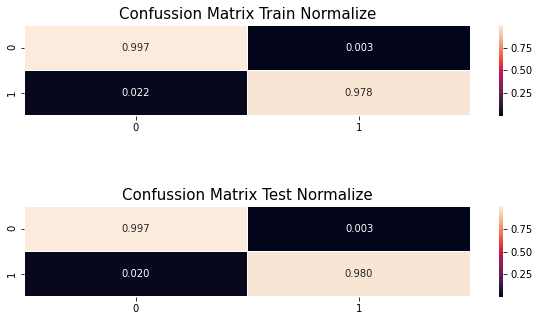

In [55]:
print('Confussion Matrix')
confussion_matrix_train_test(ex2.y_train, y_train_2_predict, ex2.y_test, y_test_2_predict, normalize = True)

# Sklearn

In [56]:
lr2 = LogisticRegression()
lr2.fit(ex2.X_train_scaled, ex2.y_train)
print('Accuracy Default Train:', lr2.score(ex2.X_train_scaled, ex2.y_train))
print('Accuracy Default Test:',lr2.score(ex2.X_test_scaled, ex2.y_test))

Accuracy Default Train: 0.8019504876219055
Accuracy Default Test: 0.8086344151867728


Classifcation


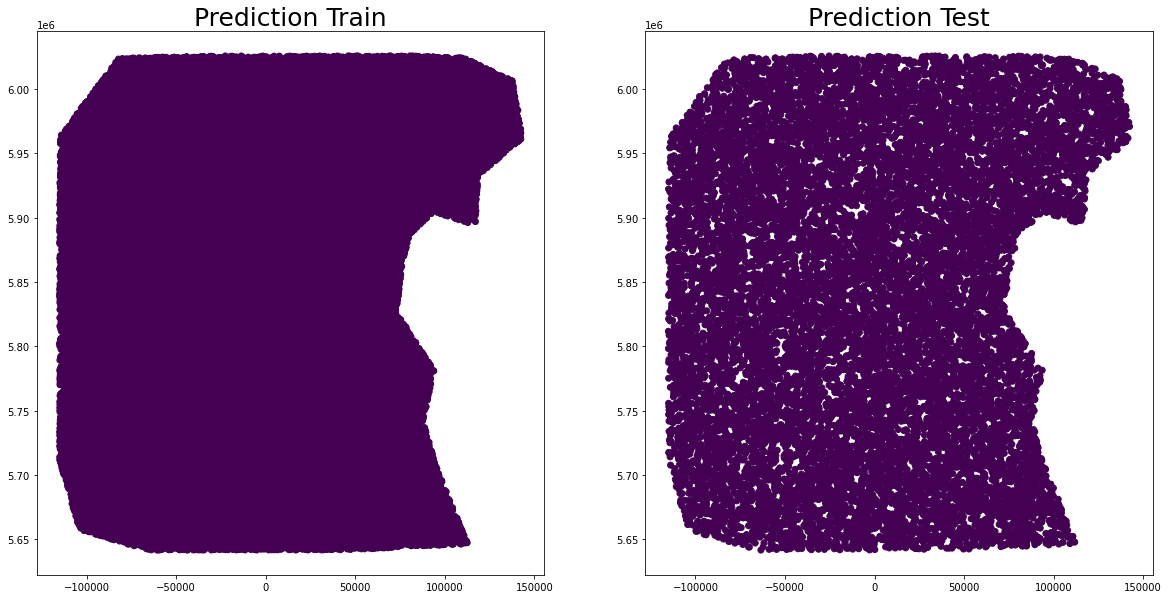

In [57]:
y_train_2_predict = lr2.predict(ex2.X_train_scaled)
y_test_2_predict = lr2.predict(ex2.X_test_scaled)
print('Classifcation')
visualize_data2d_train_test(np.array(ex2.X_train), y_train_2_predict, np.array(ex2.X_test), y_test_2_predict, prediction=True)

### Maybe changing threshold since 0.5 to a low level, it can learn and recognize the fishing zone